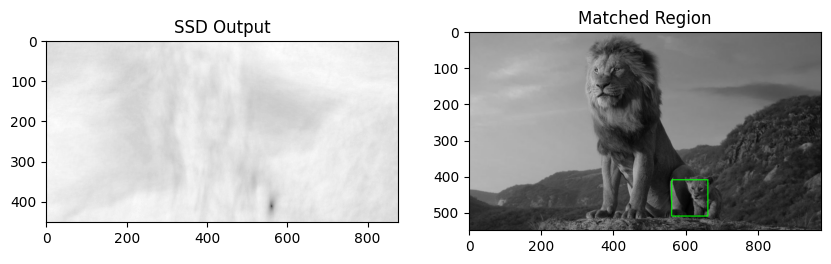

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the main image and the template image in grayscale
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)

# Get dimensions of the template
template_height, template_width = template.shape

# Create an output image to store the SSD values
ssd_output = np.zeros((image.shape[0] - template_height + 1, image.shape[1] - template_width + 1))

# Slide the template over the image
for y in range(ssd_output.shape[0]):
    for x in range(ssd_output.shape[1]):
        # Extract the region of interest from the image
        roi = image[y:y+template_height, x:x+template_width]

        # Compute the SSD between the template and the region of interest
        ssd = np.sum((roi - template) ** 2)

        # Store the result in the output image
        ssd_output[y, x] = ssd

# Find the location with the minimum SSD
min_val = np.min(ssd_output)
min_loc = np.unravel_index(np.argmin(ssd_output), ssd_output.shape)

# Draw a rectangle around the matched region
top_left = min_loc[::-1]
bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
matched_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

# Display the matched region
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('SSD Output')
plt.imshow(ssd_output, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Matched Region')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.show()